#CS584 NLP HW2
Milan Chandiramani CWID: 20032010

In [1]:
!pip install gensim

In [46]:
#Importing all the libraries
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
import numpy as np
import random
import gensim.downloader as api
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Task: Sentiment Analysis with Text Classification**

## 1. Data preparation (20 points)


### 1) Data preprocessing (10 points)

In [3]:
#Load the dataset
df = pd.read_csv('amazon_reviews.csv')
df.head()

,overall,reviewText
0,4,No issues.
1,5,"Purchased this for my device, it worked as adv..."
2,4,it works as expected. I should have sprung for...
3,5,This think has worked out great.Had a diff. br...
4,5,"Bought it with Retail Packaging, arrived legit..."


In [4]:
df.shape

(4915, 2)

In [5]:
# Drop rows with missing data
df = df.dropna(subset=['overall', 'reviewText'])
df.shape

(4914, 2)

In [6]:
print(df['overall'].value_counts())

overall
5    3921
4     527
1     244
3     142
2      80
Name: count, dtype: int64


In [7]:
print(df.dtypes) #check if datatype of both the columns are proper
print(df.describe())

overall        int64
reviewText    object
dtype: object
           overall
count  4914.000000
mean      4.587505
std       0.996929
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000


In [8]:
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# I am not removing stopwords as professor asked to not remove stopwords starting HW2
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens]
    return ' '.join(tokens)
    # return tokens
df['cleanedReviews'] = df['reviewText'].apply(preprocess)
df['numCleanedReviews'] = df['cleanedReviews'].apply(len)
df.head()

,overall,reviewText,cleanedReviews,numCleanedReviews
0,4,No issues.,no issues,9
1,5,"Purchased this for my device, it worked as adv...",purchased this for my device it worked as adve...,154
2,4,it works as expected. I should have sprung for...,it works as expected i should have sprung for ...,162
3,5,This think has worked out great.Had a diff. br...,this think has worked out greathad a diff bran...,311
4,5,"Bought it with Retail Packaging, arrived legit...",bought it with retail packaging arrived legit ...,276


In [9]:
#Vectorizing the reviewText column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleanedReviews'])
y = df['overall']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
df['tokenizedReviews'] = df['cleanedReviews'].apply(lambda x: word_tokenize(x))
#Display the tokenized data
print(X.shape)
print(y.shape)

print(df[['tokenizedReviews', 'overall']].head())

(4914, 9799)
(4914,)
                                    tokenizedReviews  overall
0                                       [no, issues]        4
1  [purchased, this, for, my, device, it, worked,...        5
2  [it, works, as, expected, i, should, have, spr...        4
3  [this, think, has, worked, out, greathad, a, d...        5
4  [bought, it, with, retail, packaging, arrived,...        5


In [10]:
y_encoded

array([3, 4, 3, ..., 4, 4, 4])

In [11]:
#Creating the corpus
all_words = [word for sentence in df['tokenizedReviews'] for word in sentence]
word_freq = Counter(all_words)
vocab = {word: idx for idx, (word, _) in enumerate(word_freq.items())}

vocab_size = len(vocab)

print(f"Vocab Size: {vocab_size}")
print("Vocabulary:")
print(len(vocab))
print(vocab)

Vocab Size: 9825
Vocabulary:
9825
{'no': 0, 'issues': 1, 'purchased': 2, 'this': 3, 'for': 4, 'my': 5, 'device': 6, 'it': 7, 'worked': 8, 'as': 9, 'advertised': 10, 'you': 11, 'can': 12, 'never': 13, 'have': 14, 'too': 15, 'much': 16, 'phone': 17, 'memory': 18, 'since': 19, 'i': 20, 'download': 21, 'a': 22, 'lot': 23, 'of': 24, 'stuff': 25, 'was': 26, 'brainer': 27, 'me': 28, 'works': 29, 'expected': 30, 'should': 31, 'sprung': 32, 'the': 33, 'higher': 34, 'capacity': 35, 'think': 36, 'its': 37, 'made': 38, 'bit': 39, 'cheesier': 40, 'than': 41, 'earlier': 42, 'versions': 43, 'paint': 44, 'looks': 45, 'not': 46, 'clean': 47, 'before': 48, 'has': 49, 'out': 50, 'greathad': 51, 'diff': 52, 'bran': 53, 'gb': 54, 'card': 55, 'and': 56, 'if': 57, 'went': 58, 'south': 59, 'after': 60, 'monthsthis': 61, 'one': 62, 'held': 63, 'up': 64, 'pretty': 65, 'well': 66, 'had': 67, 's': 68, 'now': 69, 'on': 70, 'note': 71, 'update': 72, 'ive': 73, 'few': 74, 'months': 75, 'zero': 76, 'transferred': 77,

###2) Data split (5 points):

In [61]:
# Split data (0.8 / 0.1 / 0.1 train/val/test, stratified)

X = df['cleanedReviews']
y = df['overall']

X_train, X_temp, y_train, y_temp = train_test_split(df['cleanedReviews'], df['overall'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [62]:
# Vectorizing the training, validation, and testing data
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Create DataFrames for the train, validation, and test sets
train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
train_df['label'] = y_train.reset_index(drop=True)
train_df['cleanedReviews'] = X_train.reset_index(drop=True)

val_df = pd.DataFrame(X_val_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
val_df['label'] = y_val.reset_index(drop=True)
val_df['cleanedReviews'] = X_val.reset_index(drop=True)

test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
test_df['label'] = y_test.reset_index(drop=True)
test_df['cleanedReviews'] = X_test.reset_index(drop=True)

print(f"Training set size: {train_df.shape[0]} samples")
print(f"Validation set size: {val_df.shape[0]} samples")
print(f"Testing set size: {test_df.shape[0]} samples")

Training set size: 3931 samples
Validation set size: 491 samples
Testing set size: 492 samples


### 3) Data statistics (5 points):

In [14]:
# Gather statistics
def stats(split):
    return {
        "Number of Samples": len(split),
        "Rating 1": int((split['label'] == 1).sum()),
        "Rating 2": int((split['label'] == 2).sum()),
        "Rating 3": int((split['label'] == 2).sum()),
        "Rating 4": int((split['label'] == 2).sum()),
        "Rating 5": int((split['label'] == 2).sum()),
        "min_tokens": int(split['cleanedReviews'].apply(str.split).apply(len).min()),
        "avg_tokens": float(round(split['cleanedReviews'].apply(str.split).apply(len).mean(), 2)),
        "max_tokens": int(split['cleanedReviews'].apply(str.split).apply(len).max()),
    }

stats_df = pd.DataFrame(
    [stats(train_df), stats(val_df), stats(test_df)],
    index=['train', 'validation', 'test']
)

print(stats_df)
print(df[['overall', 'reviewText', 'cleanedReviews', 'numCleanedReviews']].head())


            Number of Samples  Rating 1  Rating 2  Rating 3  Rating 4  \
train                    3931       200        68        68        68   
validation                491        22         7         7         7   
test                      492        22         5         5         5   

            Rating 5  min_tokens  avg_tokens  max_tokens  
train             68           1       49.60        1515  
validation         7           2       50.77         632  
test               5           3       47.07         685  
   overall                                         reviewText  \
0        4                                         No issues.   
1        5  Purchased this for my device, it worked as adv...   
2        4  it works as expected. I should have sprung for...   
3        5  This think has worked out great.Had a diff. br...   
4        5  Bought it with Retail Packaging, arrived legit...   

                                      cleanedReviews  numCleanedReviews  
0     

In [15]:
stats_df['Rating 1']

,Rating 1
train,200
validation,22
test,22


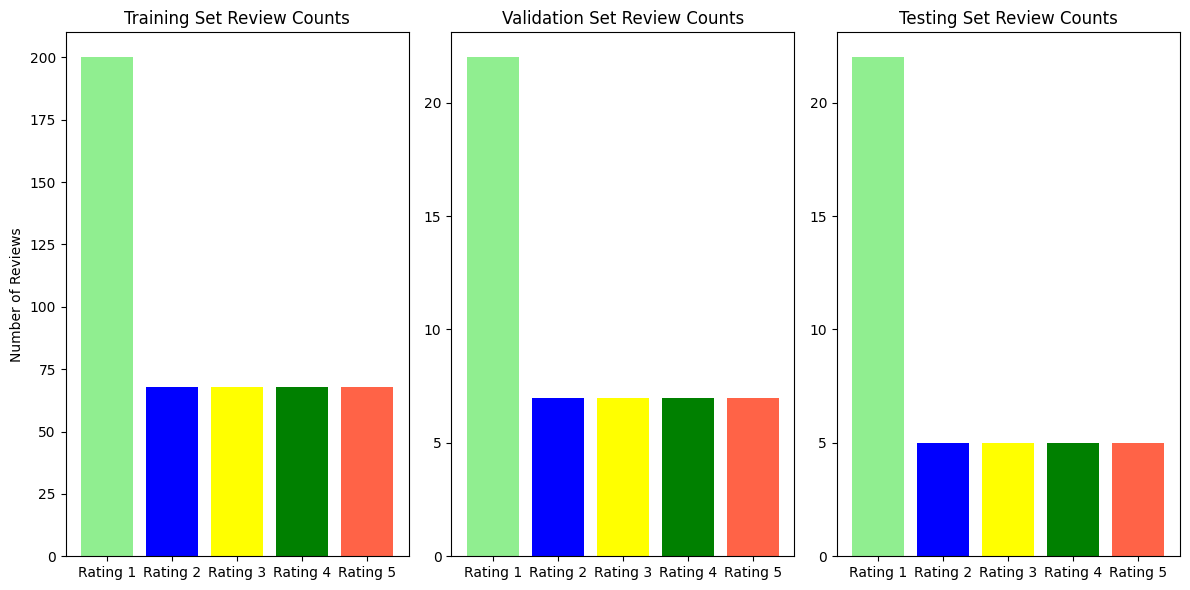

In [16]:
# Plotting the counts of positive and negative reviews
labels = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']
train_counts = [stats_df['Rating 1']['train'], stats_df['Rating 2']['train'], \
                stats_df['Rating 3']['train'], stats_df['Rating 4']['train'], \
                stats_df['Rating 5']['train']]
val_counts = [stats_df['Rating 1']['validation'], stats_df['Rating 2']['validation'], \
              stats_df['Rating 3']['validation'], stats_df['Rating 4']['validation'], \
              stats_df['Rating 5']['validation']]
test_counts = [stats_df['Rating 1']['test'], stats_df['Rating 2']['test'], \
                stats_df['Rating 3']['test'], stats_df['Rating 4']['test'], \
                stats_df['Rating 5']['test']]

x = range(len(labels))

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(x, train_counts, color=['lightgreen', 'blue', 'yellow', 'green', 'tomato'])
plt.xticks(x, labels)
plt.title('Training Set Review Counts')
plt.ylabel('Number of Reviews')

plt.subplot(1, 3, 2)
plt.bar(x, val_counts, color=['lightgreen', 'blue', 'yellow', 'green', 'tomato'])
plt.xticks(x, labels)
plt.title('Validation Set Review Counts')

plt.subplot(1, 3, 3)
plt.bar(x, test_counts, color=['lightgreen', 'blue', 'yellow', 'green', 'tomato'])
plt.xticks(x, labels)
plt.title('Testing Set Review Counts')

plt.tight_layout()
plt.show()

Training Set Class Proportions:
 label
5    79.648944
4    10.684304
1     5.087764
3     2.849148
2     1.729840
Name: proportion, dtype: float64

Validation Set Class Proportions:
 label
5    79.022403
4    10.997963
1     4.480652
3     4.073320
2     1.425662
Name: proportion, dtype: float64

Testing Set Class Proportions:
 label
5    81.707317
4    10.772358
1     4.471545
3     2.032520
2     1.016260
Name: proportion, dtype: float64


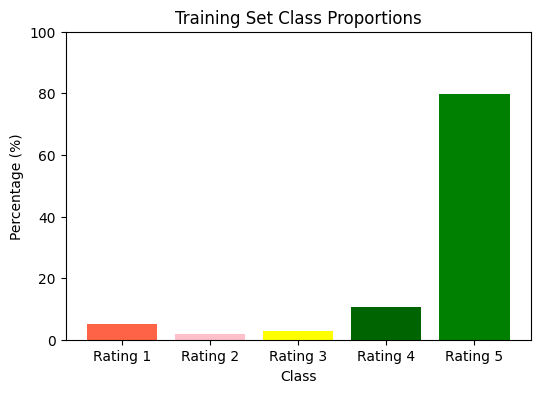

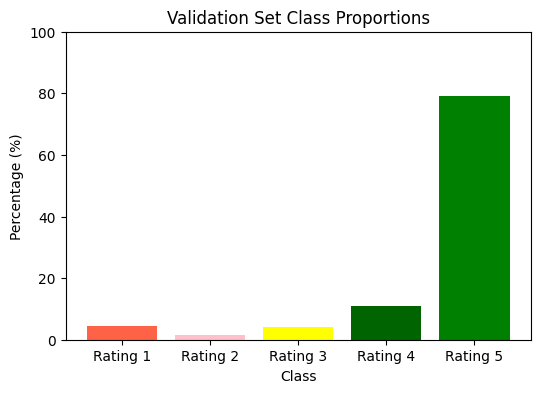

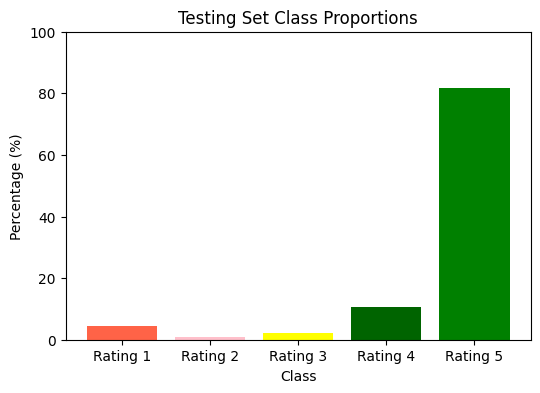

In [17]:
#Class Proportion
def class_proportions(df, label_col):
    return df[label_col].value_counts(normalize=True) * 100

train_proportions = class_proportions(train_df, 'label')
val_proportions = class_proportions(val_df, 'label')
test_proportions = class_proportions(test_df, 'label')

print("Training Set Class Proportions:\n", train_proportions)
print("\nValidation Set Class Proportions:\n", val_proportions)
print("\nTesting Set Class Proportions:\n", test_proportions)

def plot_class_proportions(proportions, dataset_name):
    plt.figure(figsize=(6, 4))
    plt.bar(proportions.index, proportions.values, color=['green', 'darkgreen', 'tomato', 'yellow', 'pink'])
    plt.xticks([1, 2, 3, 4, 5], labels)
    plt.title(f'{dataset_name} Class Proportions')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Class')
    plt.ylim(0, 100)
    plt.show()

# Plot proportions for each dataset
plot_class_proportions(train_proportions, 'Training Set')
plot_class_proportions(val_proportions, 'Validation Set')
plot_class_proportions(test_proportions, 'Testing Set')

In [73]:
# Mean and Median
def class_counts_stats(df, label_col):
    counts = df[label_col].value_counts().sort_index()
    return counts.mean(), counts.median(), counts

# Compute stats for train, val, and test sets
train_mean, train_median, train_counts = class_counts_stats(train_df, 'label')
val_mean, val_median, val_counts = class_counts_stats(val_df, 'label')
test_mean, test_median, test_counts = class_counts_stats(test_df, 'label')

# Print counts
print("Training Set Class Counts:\n", train_counts)
print("Validation Set Class Counts:\n", val_counts)
print("Testing Set Class Counts:\n", test_counts)

# Print mean and median
print(f"\nTraining Set Mean Count: {train_mean:.2f}, Median Count: {train_median:.2f}")
print(f"Validation Set Mean Count: {val_mean:.2f}, Median Count: {val_median:.2f}")
print(f"Testing Set Mean Count: {test_mean:.2f}, Median Count: {test_median:.2f}")


Training Set Class Counts:
 label
1     200
2      68
3     112
4     420
5    3131
Name: count, dtype: int64
Validation Set Class Counts:
 label
1     22
2      7
3     20
4     54
5    388
Name: count, dtype: int64
Testing Set Class Counts:
 label
1     22
2      5
3     10
4     53
5    402
Name: count, dtype: int64

Training Set Mean Count: 786.20, Median Count: 200.00
Validation Set Mean Count: 98.20, Median Count: 22.00
Testing Set Mean Count: 98.40, Median Count: 22.00


In [77]:
# Grouping labels and calculate token stats
df['tokenLength'] = df['tokenizedReviews'].apply(len)
train_df['tokenLength'] = df['tokenLength'][:len(y_train)].reset_index(drop=True)
token_stats_per_class = train_df.groupby('label')['tokenLength'].agg(['min', 'mean', 'max'])

print("\nToken Statistics Per Class (Training Set):")
print(token_stats_per_class)


Token Statistics Per Class (Training Set):
       min       mean   max
label                      
1        1  45.430000   267
2       16  51.147059   220
3       10  44.919643   157
4        1  49.321429   891
5        1  48.889812  1013


In [74]:
# Standard deviation

def class_counts_stats(df, label_col):
    counts = df[label_col].value_counts()
    return counts.mean(), counts.median(), counts.std(), counts

train_mean, train_median, train_std, train_counts = class_counts_stats(train_df, 'label')
val_mean, val_median, val_std, val_counts = class_counts_stats(val_df, 'label')
test_mean, test_median, test_std, test_counts = class_counts_stats(test_df, 'label')

print(f"\nTraining Set Mean Count: {train_mean:.2f}, Median Count: {train_median:.2f}, Standard Deviation: {train_std:.2f}")
print(f"\nValidation Set Mean Count: {val_mean:.2f}, Median Count: {val_median:.2f}, Standard Deviation: {val_std:.2f}")
print(f"\nTesting Set Mean Count: {test_mean:.2f}, Median Count: {test_median:.2f}, Standard Deviation: {test_std:.2f}")



Training Set Mean Count: 786.20, Median Count: 200.00, Standard Deviation: 1317.78

Validation Set Mean Count: 98.20, Median Count: 22.00, Standard Deviation: 162.92

Testing Set Mean Count: 98.40, Median Count: 22.00, Standard Deviation: 170.74


## 2. Sentiment Analysis with RNN (40 points)
Please write the code to perform the sentiment analysis task you formulated in question 1.
During the implementation, you will need to follow the requirements listed below.
1) You can select to implement 2-layer LSTM or GRU (you can directly call packages in
Pytorch).
2) Please use SGD during optimization.
3) Please initialize the word embeddings randomly and learn them during the model training.
4) You can decide other parameters.

1. Tokenization and Padding
Convert the text data into sequences of integer tokens, and pad them to ensure all sequences have the same length.

In [63]:
# Tokenization and Padding for LSTM
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

2. Tensor Conversion
Transform the padded sequences and their corresponding labels into PyTorch tensors to prepare them for model input.

In [64]:
# Convert tokenized data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pad, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_pad, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pad, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values - 1, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values - 1, dtype=torch.long)
# Subtracting 1 makes classes start at 0, which is what PyTorch expects for CrossEntropyLoss
#CrossEntropyLoss automatically applies log_softmax internally, so we will give direct output and not add a softmax layer in the lstm.

3. Model Definition (LSTM Network)
Define an LSTM-based neural network consisting of:
An embedding layer to learn word representations.
An LSTM layer to capture sequential dependencies in text.

In [65]:
#LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = lstm_out[:, -1, :]
        output = self.fc(lstm_out)
        return output

# Parameters
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 100  # Embedding dimensions
hidden_dim = 64  # LSTM hidden dimensions
output_dim = 5  # Binary classification output

In [66]:
# Create the model instance
rnn_model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)

4. Model Configuration:

Specify the loss function CrossEntropyLoss, and SGD optimizer to train the model.

In [67]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01) # We use Stochastic gradient descent as optimizer as highlighted by Professor

5. Training Loop:

Train the model across multiple epochs by:

Forward passing inputs through the network

Computing the loss

Backpropagating gradients

Updating model weights

Track and report loss and accuracy on both training and validation sets.

In [68]:
# Training loop with evaluation on validation and test sets
def train_model(model, train_loader, val_loader, test_loader, optimizer, criterion, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        train_losses = []
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        # Validation
        model.eval()
        val_losses = []
        val_preds = []
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)
                val_losses.append(val_loss.item())
                val_preds.extend(val_outputs.argmax(dim=1).cpu().numpy())
        val_accuracy = np.mean(val_preds == y_val_tensor.cpu().numpy())


        # Test evaluation
        test_losses = []
        test_preds = []
        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = model(test_inputs)
                test_loss = criterion(test_outputs, test_labels)
                test_losses.append(test_loss.item())
                test_preds.extend(test_outputs.argmax(dim=1).cpu().numpy())

        test_accuracy = np.mean(test_preds == y_test_tensor.cpu().numpy())

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {np.mean(train_losses):.4f}, Val Loss: {np.mean(val_losses):.4f}, Val Accuracy: {val_accuracy:.4f}, Test Loss: {np.mean(test_losses):.4f}, Test Accuracy: {test_accuracy:.4f}")

    return val_accuracy, test_accuracy

6. Data Loading:

Wrap the tensors into TensorDataset objects and create DataLoaders to efficiently batch, shuffle, and iterate through the data during training and validation.

In [69]:
# Create DataLoader instances
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

7. Model Evaluation:

After training, evaluate the model on the test dataset to measure its final performance and generalization accuracy.

In [70]:
# Train the model and get final validation and test accuracies
final_val_accuracy, final_test_accuracy = train_model(rnn_model, train_loader, val_loader, test_loader, optimizer, criterion, num_epochs=10)

print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

Epoch 1/10, Train Loss: 1.2436, Val Loss: 1.0571, Val Accuracy: 0.7902, Test Loss: 1.0076, Test Accuracy: 0.8171
Epoch 2/10, Train Loss: 0.9254, Val Loss: 0.8766, Val Accuracy: 0.7902, Test Loss: 0.7986, Test Accuracy: 0.8171
Epoch 3/10, Train Loss: 0.8093, Val Loss: 0.8216, Val Accuracy: 0.7902, Test Loss: 0.7261, Test Accuracy: 0.8171
Epoch 4/10, Train Loss: 0.7734, Val Loss: 0.8057, Val Accuracy: 0.7902, Test Loss: 0.7006, Test Accuracy: 0.8171
Epoch 5/10, Train Loss: 0.7609, Val Loss: 0.7991, Val Accuracy: 0.7902, Test Loss: 0.6891, Test Accuracy: 0.8171
Epoch 6/10, Train Loss: 0.7550, Val Loss: 0.7953, Val Accuracy: 0.7902, Test Loss: 0.6821, Test Accuracy: 0.8171
Epoch 7/10, Train Loss: 0.7515, Val Loss: 0.7924, Val Accuracy: 0.7902, Test Loss: 0.6779, Test Accuracy: 0.8171
Epoch 8/10, Train Loss: 0.7486, Val Loss: 0.7904, Val Accuracy: 0.7902, Test Loss: 0.6744, Test Accuracy: 0.8171
Epoch 9/10, Train Loss: 0.7465, Val Loss: 0.7889, Val Accuracy: 0.7902, Test Loss: 0.6719, Test 

##3. Sentiment Analysis with CNN (40 points)
Please write the code to perform the sentiment analysis task you formulated in question 1.
During the implementation, you will need to follow the requirements listed below. Feel free to
use any packages and libraries.
1) Please use mini-batch gradient descent method during optimization with batch size 20.
2) Please initialize the word embeddings with the pre-trained glove embeddings you used
in HW1 and update them during the model training.
3) You can decide other parameters.

In [52]:
texts = df['cleanedReviews'].values
labels = df['overall'].values

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Padding sequences
max_length = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=max_length)
y = labels


In [53]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [54]:
# Load GloVe embeddings
def load_embedding_model():
    embeddings_index = {}
    """ Load GloVe Vectors
    Return:
    wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin
#Load GloVe word embeddings
glove_embeddings = load_embedding_model()

Loaded vocab size 400000


In [55]:
# Create an embedding matrix
embedding_dim = 200
num_words = min(20000, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < num_words:
      if word in glove_embeddings:
        embedding_vector = glove_embeddings[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [56]:
# Convert to tensors, convert 0 to 4 by subtracting -1
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_train_tensor = torch.tensor(y_train - 1, dtype=torch.long)
y_val_tensor = torch.tensor(y_val - 1, dtype=torch.long)
y_test_tensor = torch.tensor(y_test - 1, dtype=torch.long)

In [57]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)

In [58]:
#GPU computing for faster model training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [59]:
# Define the CNN model
class SentimentCNN(nn.Module):
    def __init__(self, embedding_matrix):
        super(SentimentCNN, self).__init__()
        embedding_dim = embedding_matrix.shape[1]
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), freeze=False)
        self.conv1 = nn.Conv2d(1, 100, (3, embedding_dim))
        self.conv2 = nn.Conv2d(1, 100, (4, embedding_dim))
        self.conv3 = nn.Conv2d(1, 100, (5, embedding_dim))
        self.fc = nn.Linear(300, 5)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        conv1_out = self.conv1(x)
        conv1_out = nn.functional.relu(conv1_out.squeeze(3))
        conv1_out = nn.functional.max_pool1d(conv1_out, conv1_out.size(2)).squeeze(2)

        conv2_out = self.conv2(x)
        conv2_out = nn.functional.relu(conv2_out.squeeze(3))
        conv2_out = nn.functional.max_pool1d(conv2_out, conv2_out.size(2)).squeeze(2)

        conv3_out = self.conv3(x)
        conv3_out = nn.functional.relu(conv3_out.squeeze(3))
        conv3_out = nn.functional.max_pool1d(conv3_out, conv3_out.size(2)).squeeze(2)

        x = torch.cat((conv1_out, conv2_out, conv3_out), 1)
        x = self.fc(x)
        return x
# Initialize the model, optimizer, and loss function
cnn_model = SentimentCNN(embedding_matrix)
cnn_model.to(device)
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [43]:
# Train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for i, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            if (i+1) % 50 == 0:
                print(f"Epoch {epoch+1}, Batch {i+1}/{len(train_loader)}, Loss: {loss.item():.4f}")
        avg_loss = total_loss / len(train_loader)
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}')

#Train model using Training dataset
train_model(cnn_model, train_loader, criterion, optimizer)

Epoch 1, Batch 50/197, Loss: 0.0010
Epoch 1, Batch 100/197, Loss: 0.0008
Epoch 1, Batch 150/197, Loss: 0.0014
Epoch 1/10, Loss: 0.0025
Epoch 2, Batch 50/197, Loss: 0.0014
Epoch 2, Batch 100/197, Loss: 0.0020
Epoch 2, Batch 150/197, Loss: 0.0010
Epoch 2/10, Loss: 0.0025
Epoch 3, Batch 50/197, Loss: 0.0010
Epoch 3, Batch 100/197, Loss: 0.0009
Epoch 3, Batch 150/197, Loss: 0.0008
Epoch 3/10, Loss: 0.0018
Epoch 4, Batch 50/197, Loss: 0.0008
Epoch 4, Batch 100/197, Loss: 0.0009
Epoch 4, Batch 150/197, Loss: 0.0016
Epoch 4/10, Loss: 0.0017
Epoch 5, Batch 50/197, Loss: 0.0006
Epoch 5, Batch 100/197, Loss: 0.0007
Epoch 5, Batch 150/197, Loss: 0.0009
Epoch 5/10, Loss: 0.0013
Epoch 6, Batch 50/197, Loss: 0.0002
Epoch 6, Batch 100/197, Loss: 0.0007
Epoch 6, Batch 150/197, Loss: 0.0004
Epoch 6/10, Loss: 0.0014
Epoch 7, Batch 50/197, Loss: 0.0005
Epoch 7, Batch 100/197, Loss: 0.0008
Epoch 7, Batch 150/197, Loss: 0.0004
Epoch 7/10, Loss: 0.0023
Epoch 8, Batch 50/197, Loss: 0.0005
Epoch 8, Batch 100/

In [44]:
# Evaluate the model
def evaluate_model(model, X_tensor, y_tensor):
    model.eval()
    device = next(model.parameters()).device  # get the model's device
    X_tensor, y_tensor = X_tensor.to(device), y_tensor.to(device)
    with torch.no_grad():
        outputs = model(X_tensor)
        preds = torch.argmax(outputs, dim=1)
        accuracy = (preds == y_tensor).float().mean().item()
    return accuracy

val_accuracy = evaluate_model(cnn_model, X_val_tensor, y_val_tensor)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Test the model
test_accuracy = evaluate_model(cnn_model, X_test_tensor, y_test_tensor)
print(f'Test Accuracy: {test_accuracy:.4f}')

Validation Accuracy: 0.8024
Test Accuracy: 0.8252


## 4. Evaluation (10 points):
Train the model on the training set, select the best model based on the validation set, and
evaluate your model on the testing set.
1) Evaluate the model performance using metrics for classification, such as accuracy,
precision, recall, F1-score, and AUC. Report your results for both methods. You can use
existing pacakges in sklearn. (4 points)
2) Have a brief discussion to compare the performance of the two models. It should be noted
that there is no fixed answer for the results. You will need to report the exact results
returned in your experiments. The discussions should only be based on your own
experimental settings and returned results. (3 points)
3) Are there any differences between the results you obtained in HW1 and HW2? Which
model performs best? Can you please provide some discussions about your findings? It
would be great to think about and discuss the underlying reasons for the outperformance
of the best model. (3 points)

In [51]:

def evaluate_classification(model, X_tensor, y_tensor, threshold=0.5):
    """
    Wrote a general function to evaluate rnn and cnn model.
    """
    model.eval()
    # below code is done as cnn is on gpu and rnn is on cpu
    device = next(model.parameters()).device
    X_tensor, y_tensor = X_tensor.to(device), y_tensor.to(device)
    vocab_size = model.embedding.num_embeddings
    if X_tensor.max() >= vocab_size:
        #print(f"Warning: max token ID {X_tensor.max()} >= vocab_size {vocab_size}. Clipping IDs.")
        X_tensor = X_tensor.clamp(max=vocab_size-1)
    with torch.no_grad():
        outputs = model(X_tensor)
        probs = torch.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)

    # Move to CPU and convert to numpy
    preds_np = preds.cpu().numpy()
    y_np = y_tensor.cpu().numpy()
    probs_np = probs.cpu().numpy()

    # Compute metrics
    accuracy = accuracy_score(y_np, preds_np)
    precision = precision_score(y_np, preds_np, average='macro', zero_division=0)
    recall = recall_score(y_np, preds_np, average='macro', zero_division=0)
    f1 = f1_score(y_np, preds_np, average='macro', zero_division=0)
    auc = roc_auc_score(y_np, probs_np, multi_class='ovr')

    return accuracy, precision, recall, f1, auc


# Evaluate CNN (which is on GPU)
cnn_metrics_val = evaluate_classification(cnn_model, X_val_tensor, y_val_tensor)
cnn_metrics_test = evaluate_classification(cnn_model, X_test_tensor, y_test_tensor)

print("CNN Validation Metrics:")
print(f"Accuracy: {cnn_metrics_val[0]:.4f}, Precision: {cnn_metrics_val[1]:.4f}, Recall: {cnn_metrics_val[2]:.4f}, F1: {cnn_metrics_val[3]:.4f}, AUC: {cnn_metrics_val[4]:.4f}")

print("CNN Test Metrics:")
print(f"Accuracy: {cnn_metrics_test[0]:.4f}, Precision: {cnn_metrics_test[1]:.4f}, Recall: {cnn_metrics_test[2]:.4f}, F1: {cnn_metrics_test[3]:.4f}, AUC: {cnn_metrics_test[4]:.4f}")


# Evaluate RNN (CPU)

rnn_metrics_val = evaluate_classification(rnn_model, X_val_tensor.cpu(), y_val_tensor.cpu())
rnn_metrics_test = evaluate_classification(rnn_model, X_test_tensor.cpu(), y_test_tensor.cpu())

print("RNN Validation Metrics:")
print(f"Accuracy: {rnn_metrics_val[0]:.4f}, Precision: {rnn_metrics_val[1]:.4f}, Recall: {rnn_metrics_val[2]:.4f}, F1: {rnn_metrics_val[3]:.4f}, AUC: {rnn_metrics_val[4]:.4f}")

print("RNN Test Metrics:")
print(f"Accuracy: {rnn_metrics_test[0]:.4f}, Precision: {rnn_metrics_test[1]:.4f}, Recall: {rnn_metrics_test[2]:.4f}, F1: {rnn_metrics_test[3]:.4f}, AUC: {rnn_metrics_test[4]:.4f}")


CNN Validation Metrics:
Accuracy: 0.8024, Precision: 0.4042, Recall: 0.3205, F1: 0.3298, AUC: 0.8046
CNN Test Metrics:
Accuracy: 0.8252, Precision: 0.3922, Recall: 0.3398, F1: 0.3491, AUC: 0.8307
RNN Validation Metrics:
Accuracy: 0.7902, Precision: 0.1580, Recall: 0.2000, F1: 0.1766, AUC: 0.5126
RNN Test Metrics:
Accuracy: 0.8171, Precision: 0.1634, Recall: 0.2000, F1: 0.1799, AUC: 0.5227


2) Have a brief discussion to compare the performance of the two models. It should be noted
that there is no fixed answer for the results. You will need to report the exact results
returned in your experiments. The discussions should only be based on your own
experimental settings and returned results. (3 points)

                            Model	Accuracy	Precision	Recall	F1	AUC

                CNN (Val)	 0.8024	0.4042	0.3205	0.3298	0.8046

                CNN (Test)	0.8252	0.3922	0.3398	0.3491	0.8307

                RNN (Val)	 0.7902	0.1580	0.2000	0.1766	0.5126

                RNN (Test)	0.8171	0.1634	0.2000	0.1799	0.5227



Accuracy: CNN slightly outperforms RNN (0.825 vs 0.817 on test set). Both models achieve moderate accuracy in multi-class classification.

Precision, Recall, F1:
 CNN shows higher precision (0.39 vs 0.16), recall (0.34 vs 0.20), and F1-score (0.35 vs 0.18) compared to RNN.

RNN struggles to predict multiple classes accurately; many classes have few or no predictions, which explains very low macro-averaged metrics.

AUC:

CNN: 0.83; reasonable discrimination among 5 classes.
RNN: 0.52; barely better than random guessing, indicating weak class separation.

Conclusion:

CNN outperforms RNN in all metrics on this multi-class classification task. CNN’s convolutional layers can capture local n-gram patterns in the text sequences, which helps distinguish between subtle differences in ratings. RNN may struggle here due to less contextual knowledge as it is trained on TFIDF Vectorization whereas CNN learns through GloVe embeddings.

3) Are there any differences between the results you obtained in HW1 and HW2? Which
model performs best? Can you please provide some discussions about your findings? It
would be great to think about and discuss the underlying reasons for the outperformance
of the best model. (3 points)

HW1 metrics (binary):

Model	Accuracy	Precision	Recall	F1	AUC
Logistic Regression	0.9350	0.9572	0.9739	0.9654	0.9253
Feedforward NN	0.9533	0.9599	0.9913	0.9753	0.9129

Key differences between HW1 and HW2:

Classification type:

HW1: Binary sentiment (positive/negative).

HW2: Multi-class sentiment (ratings 1–5). Multi-class tasks are inherently harder, leading to lower accuracy, F1, and AUC.

Model performance:

HW1 classical models (LR, FFNN) perform much better (accuracy >0.93, F1 >0.96) than HW2 deep learning models (CNN ~0.82, RNN ~0.82).

CNN is the best among HW2 models, but still underperforms compared to classical models in HW1.

RNN shows poor performance, particularly in macro-averaged metrics, likely due to sparse predictions for some classes.

Possible reasons for CNN’s outperformance over RNN:

CNN can extract local patterns (n-grams), which is helpful for multi-class ratings.

RNN may not capture long-distance dependencies efficiently in this setup, especially with limited data or token clipping.

Multi-class imbalance may also affect RNN more strongly.

Takeaway:

Best model overall: Feedforward Neural Network from HW1 (binary sentiment), due to simpler binary task and strong feature representation (likely TF-IDF).

For HW2, CNN performs better than RNN for multi-class ratings.
As mentioned above, the models in HW2 are doing multi-class classification without stopword removal which may be a reason of lower precision and recall. RNN may struggle here due to less contextual knowledge as it is trained on TFIDF Vectorization whereas CNN learns through GloVe embeddings. Furthermore, it might be possible that stopword removal improved the binary classification process and no stopword removal allowed some words to add confusion to learning process of the models in this HW.
Deep learning models may require larger datasets, tuned embeddings, and careful handling of class imbalance to outperform classical models in multi-classification tasks.

# Task 3. Self-Reflection (5 points)
This question is required in the submission to help you assess your understanding of the related topics and identify the areas for further improvement and set goals accordingly.

It also promotes communication between you and the instructor and will further improve the course development and learning experience.
Question Answers
(provide the answer index)

Q1: Rate your performance


4-Somewhat satisfied

Q2: How much does your understanding of the concepts influence
your performance?


5-Very important

Q3: How much does the design of the examples/questions (is relatable
to you) influence your performance?

4-Somewhat important


Q4: When you answer Q3, which are the primary factors influencing
the relatability of the examples to you?

3-Age

6- Hobbies and interests

7- Prior knowledge about the context in the example

*Reference:*

[1] Professor Ping Wang's Slides

[2] Stanford CS224N Assignment 1: Exploring Word Vectors (25 Points) https://web.stanford.edu/class/cs224n/assignments/a1_preview/exploring_word_vectors.html

[3] Ng, A. (2021). Machine learning [Online course]. Coursera. https://www.coursera.org/learn/machine-learning

[4] Krish Naik  Day 8-LSTM Recurrent Neural Network In Depth Intuition And NLP Application|Krish Naik
Krish Naik https://www.youtube.com/watch?v=FLjn0H2bCvA

[5] Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural Computation, 9(8), 1735-1780.

[6] LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Convolutional networks for images, speech, and time-series. Proceedings of the IEEE, 86(11), 2278-2324.

[7] Pennington, J., Socher, R., & Manning, C. D. (2014). GloVe: Global Vectors for Word Representation. Stanford University. https://nlp.stanford.edu/projects/glove/



In [ ]:
#--------------------------------------------- Thank you! EOF ---------------------------------------------#